In [214]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.cm as cm
from scipy.ndimage.morphology import distance_transform_edt

In [215]:
x = np.zeros((10, 1, 50, 50))
x[:, :, 15:35, :] = 1

In [216]:
def bwdist(images, margin_fg=5, margin_bg=5):
    assert isinstance(images, np.ndarray)
    assert images.ndim == 4
    N, C, H, W = images.shape
    assert C == 1
    images = images.squeeze()
    
    for n in range(N):
        
        image1 = np.squeeze(images[n, :, :])

        fg_mask = np.zeros_like(image1, dtype=bool)
        bg_mask = np.zeros_like(image1, dtype=bool)

        dist0 = distance_transform_edt(np.logical_not(image1))
        dist1 = distance_transform_edt(image1)

        fg_mask[dist0 <= margin_fg] = 0
        fg_mask[dist0 > margin_fg] = 1
        
        bg_mask[dist1 <= margin_bg] = 0
        bg_mask[dist1 > margin_bg] = 1
        
        return np.logical_not(fg_mask), np.logical_not(bg_mask)
        
        

In [217]:
fg, bg = bwdist(x, margin_bg=5, margin_fg=5)

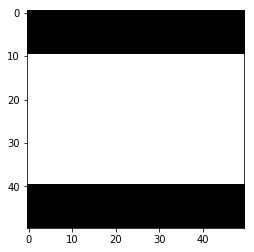

In [218]:
plt.imshow(fg, cmap=cm.Greys_r)

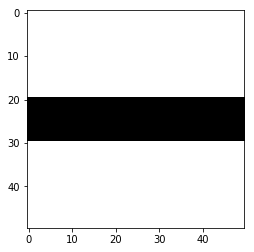

In [219]:
plt.imshow(bg, cmap=cm.Greys_r)